# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [12]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10  # Number of pages to scrape
page_size = 100  # Number of reviews per page

reviews = []
aircraft = []
seat_type = []
route = []
recommended = []
df = pd.DataFrame()  # Create an empty DataFrame to store the data

# Loop through each page of the reviews
for i in range(1, pages + 1):
    rating = []
    category = []

    print(f"Scraping page {i}")

    # Create URL for the current page
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Make the HTTP request to fetch the page content
    response = requests.get(url)

    # Parse the page content using BeautifulSoup
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')

    # Extract the reviews' text
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    # Extract ratings and categories
    for para2 in parsed_content.find_all("div", {"class": "review-stats"}):
        for para3 in para2.find_all('td', {'class': 'review-value'}):
            rating.append(para3.get_text())
        recomend = rating[-1]
        rating = rating[:-1]

        # Extract star ratings
        for para4 in para2.find_all('td', {'class': 'review-rating-stars stars'}):
            para5 = len(para4.find_all('span', {'class': 'star fill'}))
            rating.append(para5)
        rating.append(recomend)

        # Extract categories of ratings (e.g., seat comfort, cabin staff service)
        for para6 in para2.find_all('td', {'class': 'review-rating-header'}):
            category.append(para6.get_text())

        # Create a temporary DataFrame from the extracted data
        data_dict = pd.DataFrame([rating], columns=category)

        # Concatenate the temporary DataFrame to the main DataFrame
        df = pd.concat([df, data_dict], ignore_index=True)

        rating = []
        category = []

    print(f"   ---> {len(reviews)} total reviews")

# Add the reviews as a new column to the DataFrame
df["reviews"] = reviews

# Display the first few rows of the DataFrame
print(df.head())

# Optionally, save the data to an Excel file
df.to_excel('british_airways_reviews.xlsx', index=False)


Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
  Aircraft Type Of Traveller       Seat Type  \
0     A321    Family Leisure   Economy Class   
1     A350    Couple Leisure  Business Class   
2      NaN      Solo Leisure   Economy Class   
3    A350       Solo Leisure   Economy Class   
4      NaN    Couple Leisure   Economy Class   

                              Route     Date Flown  Seat Comfort  \
0                 London to Belfast  November 2024           3.0   
1               Vancouver to London  November 2024           5.0   
2                  Malaga to London   October 2024           1.0   
3  Keflavik to Ca

In [13]:
import pandas as pd

# Load the existing Excel file
df = pd.read_excel('british_airways_reviews.xlsx')

# Display the first few rows of the DataFrame to check the data
print(df.head())

# Create a new column for trip verification, checking if the review starts with "✅ Trip Verified"
df['trip_verified'] = df['reviews'].apply(lambda x: 'Yes' if '✅' in str(x) else 'No')

# Remove the tick mark (✅) from the reviews column
df['reviews_cleaned'] = df['reviews'].apply(lambda x: str(x).replace('✅', '').strip())

# Display the updated DataFrame
print(df.head())




  Aircraft Type Of Traveller       Seat Type  \
0     A321    Family Leisure   Economy Class   
1     A350    Couple Leisure  Business Class   
2      NaN      Solo Leisure   Economy Class   
3    A350       Solo Leisure   Economy Class   
4      NaN    Couple Leisure   Economy Class   

                              Route     Date Flown  Seat Comfort  \
0                 London to Belfast  November 2024           3.0   
1               Vancouver to London  November 2024           5.0   
2                  Malaga to London   October 2024           1.0   
3  Keflavik to Cape Town via London   October 2024           2.0   
4  Singapore to Keflavik via London   October 2024           2.0   

   Cabin Staff Service  Ground Service  Value For Money Recommended  \
0                  2.0             5.0                5          no   
1                  5.0             3.0                4         yes   
2                  1.0             1.0                2          no   
3                 

# Exploratory data analysis and cleaning

In [15]:
df = df.drop('reviews', axis=1)

In [16]:
df

,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Ground Service,Value For Money,Recommended,Food & Beverages,Inflight Entertainment,Wifi & Connectivity,trip_verified,reviews_cleaned
0,A321,Family Leisure,Economy Class,London to Belfast,November 2024,3.0,2.0,5.0,5,no,NaN,NaN,NaN,Yes,Trip Verified | Although like many these day...
1,A350,Couple Leisure,Business Class,Vancouver to London,November 2024,5.0,5.0,3.0,4,yes,5.0,4.0,4.0,Yes,Trip Verified | This flight was British Airway...
2,NaN,Solo Leisure,Economy Class,Malaga to London,October 2024,1.0,1.0,1.0,2,no,1.0,1.0,1.0,No,Not Verified | The worst airline I have ever f...
3,A350,Solo Leisure,Economy Class,Keflavik to Cape Town via London,October 2024,2.0,2.0,1.0,2,no,1.0,NaN,NaN,Yes,"Trip Verified | Disappointing service, plane..."
4,NaN,Couple Leisure,Economy Class,Singapore to Keflavik via London,October 2024,2.0,2.0,1.0,3,no,1.0,2.0,1.0,Yes,Trip Verified | A transit visa is required f...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,NaN,Solo Leisure,Economy Class,Heathrow to Glasgow,August 2019,1.0,1.0,1.0,1,no,NaN,NaN,NaN,No,Not Verified | Heathrow to Glasgow. Again fli...
996,NaN,Solo Leisure,Economy Class,Inverness to Vancouver via London,August 2019,2.0,2.0,1.0,1,no,1.0,1.0,1.0,Yes,Trip Verified | A supremely awful experience f...
997,NaN,Couple Leisure,Economy Class,London Heathrow to Brussels,August 2019,2.0,4.0,1.0,1,no,2.0,1.0,NaN,No,Not Verified | British Airways flight to Brus...
998,NaN,Solo Leisure,Economy Class,London to Nice,August 2019,NaN,NaN,1.0,1,no,NaN,NaN,NaN,Yes,Trip Verified | London to Nice. I agree total...


# Basic information 

In [19]:
# Check the first few rows
print("First few rows")
print(df.head())

# Summary statistics for numeric columns
print("Summary statistics")
print(df.describe())

# Get the data types of each column
print("Data Type for each column")
print(df.info())

First few rows
  Aircraft Type Of Traveller       Seat Type  \
0     A321    Family Leisure   Economy Class   
1     A350    Couple Leisure  Business Class   
2      NaN      Solo Leisure   Economy Class   
3    A350       Solo Leisure   Economy Class   
4      NaN    Couple Leisure   Economy Class   

                              Route     Date Flown  Seat Comfort  \
0                 London to Belfast  November 2024           3.0   
1               Vancouver to London  November 2024           5.0   
2                  Malaga to London   October 2024           1.0   
3  Keflavik to Cape Town via London   October 2024           2.0   
4  Singapore to Keflavik via London   October 2024           2.0   

   Cabin Staff Service  Ground Service  Value For Money Recommended  \
0                  2.0             5.0                5          no   
1                  5.0             3.0                4         yes   
2                  1.0             1.0                2          no   
3  

# Handling Missing Values


In [20]:
print(df.isnull().sum())

Aircraft                  474
Type Of Traveller           2
Seat Type                   0
Route                       4
Date Flown                  0
Seat Comfort               88
Cabin Staff Service        98
Ground Service             57
Value For Money             0
Recommended                 0
Food & Beverages          224
Inflight Entertainment    481
Wifi & Connectivity       673
trip_verified               0
reviews_cleaned             0
dtype: int64


In [22]:
# fill the missing values
df.fillna(value='Not Mentioned')
df

,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Ground Service,Value For Money,Recommended,Food & Beverages,Inflight Entertainment,Wifi & Connectivity,trip_verified,reviews_cleaned
0,A321,Family Leisure,Economy Class,London to Belfast,November 2024,3.0,2.0,5.0,5,no,NaN,NaN,NaN,Yes,Trip Verified | Although like many these day...
1,A350,Couple Leisure,Business Class,Vancouver to London,November 2024,5.0,5.0,3.0,4,yes,5.0,4.0,4.0,Yes,Trip Verified | This flight was British Airway...
2,NaN,Solo Leisure,Economy Class,Malaga to London,October 2024,1.0,1.0,1.0,2,no,1.0,1.0,1.0,No,Not Verified | The worst airline I have ever f...
3,A350,Solo Leisure,Economy Class,Keflavik to Cape Town via London,October 2024,2.0,2.0,1.0,2,no,1.0,NaN,NaN,Yes,"Trip Verified | Disappointing service, plane..."
4,NaN,Couple Leisure,Economy Class,Singapore to Keflavik via London,October 2024,2.0,2.0,1.0,3,no,1.0,2.0,1.0,Yes,Trip Verified | A transit visa is required f...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,NaN,Solo Leisure,Economy Class,Heathrow to Glasgow,August 2019,1.0,1.0,1.0,1,no,NaN,NaN,NaN,No,Not Verified | Heathrow to Glasgow. Again fli...
996,NaN,Solo Leisure,Economy Class,Inverness to Vancouver via London,August 2019,2.0,2.0,1.0,1,no,1.0,1.0,1.0,Yes,Trip Verified | A supremely awful experience f...
997,NaN,Couple Leisure,Economy Class,London Heathrow to Brussels,August 2019,2.0,4.0,1.0,1,no,2.0,1.0,NaN,No,Not Verified | British Airways flight to Brus...
998,NaN,Solo Leisure,Economy Class,London to Nice,August 2019,NaN,NaN,1.0,1,no,NaN,NaN,NaN,Yes,Trip Verified | London to Nice. I agree total...


# Analysing categorical columns

In [29]:
print('Aircraft',df['Aircraft'].nunique())
print('Type Of Traveller',df['Type Of Traveller'].nunique())
print('Seat Type',df['Seat Type'].nunique())
print('Recommended',df['Recommended'].nunique())
print('trip_verified',df['trip_verified'].nunique())

Aircraft 73
Type Of Traveller 4
Seat Type 4
Recommended 2
trip_verified 2


### Aircraft distribution

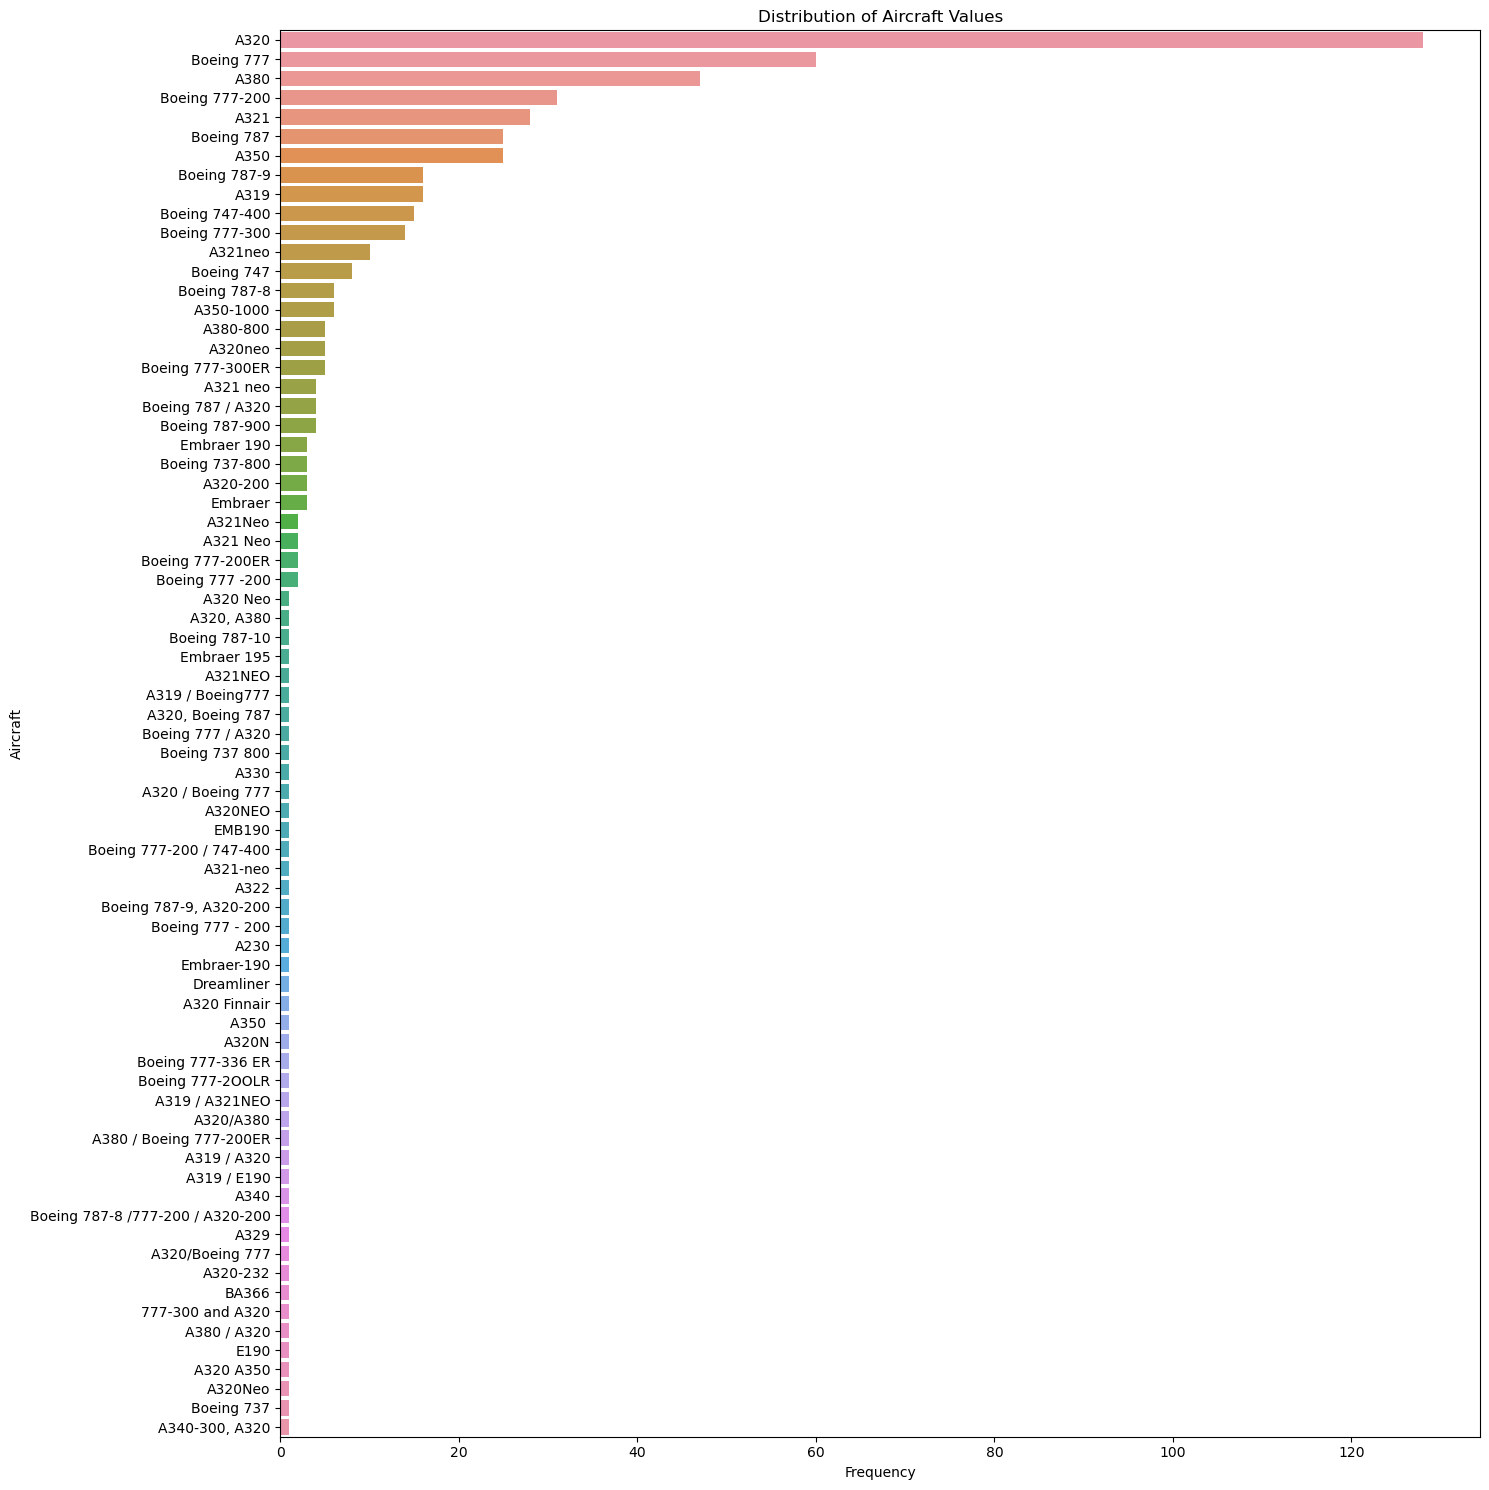

In [55]:
aircraft_counts = df['Aircraft'].value_counts()

# Plot the distribution as a horizontal bar chart
plt.figure(figsize=(15, 15))
sns.barplot(y=aircraft_counts.index, x=aircraft_counts.values, orient='h')

# Add labels and title
plt.ylabel('Aircraft')
plt.xlabel('Frequency')
plt.title('Distribution of Aircraft Values')

# Show the plot
plt.tight_layout()  # To ensure everything fits in the figure
plt.show()

### Distribution of type of travellers, seat type, recomendation and trip verification

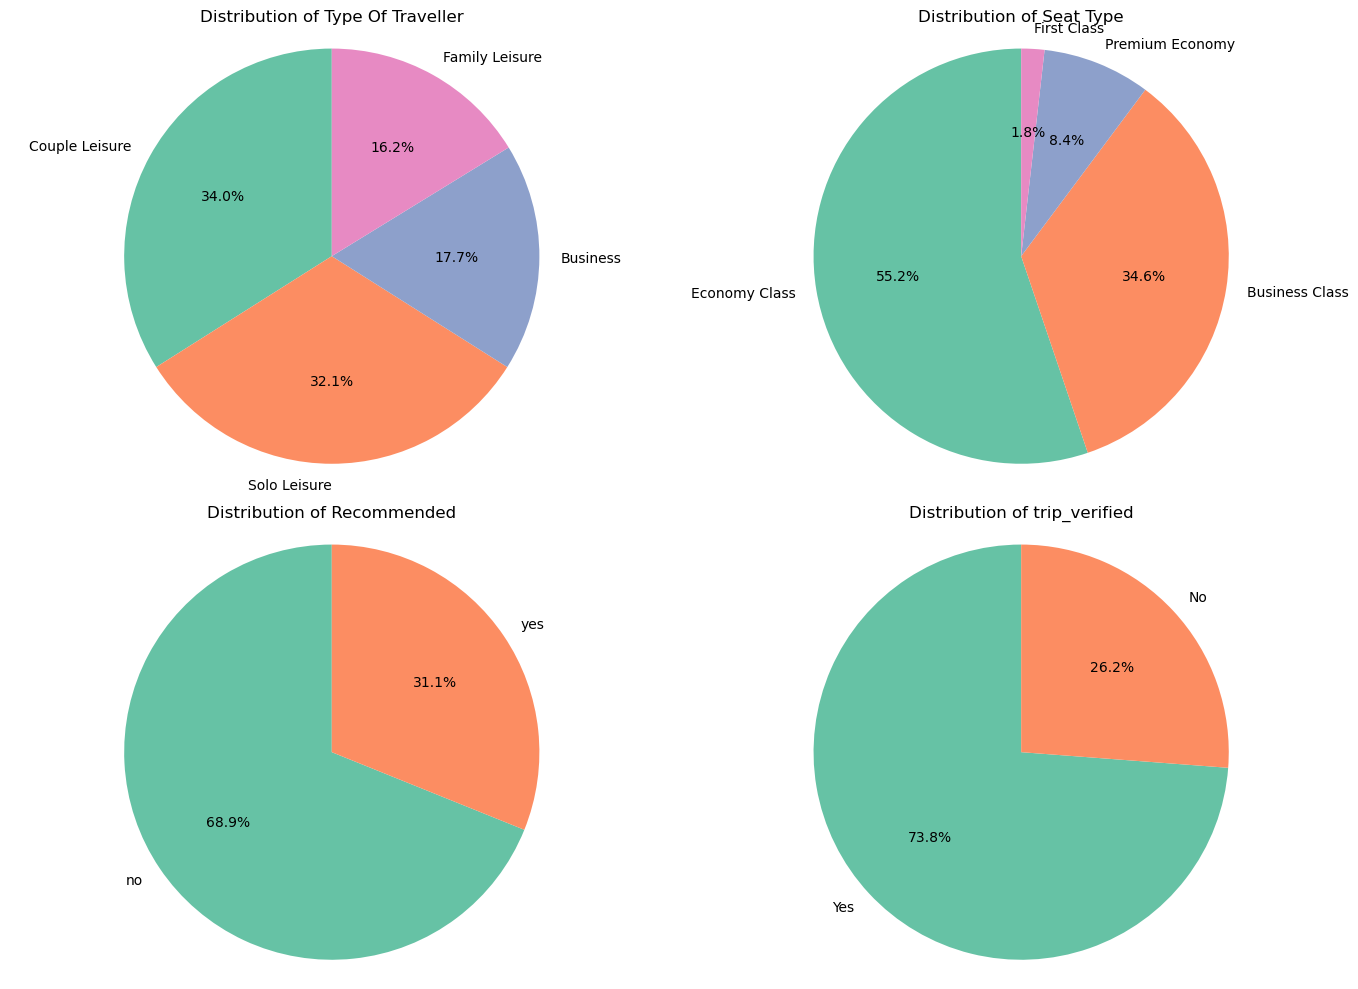

In [31]:
import matplotlib.pyplot as plt

# List of columns to plot
columns = ['Type Of Traveller', 'Seat Type', 'Recommended', 'trip_verified']

# Set up the plotting grid
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through each column to create the pie charts
for i, col in enumerate(columns):
    # Get the value counts for the column
    value_counts = df[col].value_counts()
    
    # Plot the pie chart
    axes[i].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2", len(value_counts)))
    
    # Set title and display percentages
    axes[i].set_title(f'Distribution of {col}')
    axes[i].axis('equal')  # Equal aspect ratio ensures the pie is circular.

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


# Analysing numerical columns 

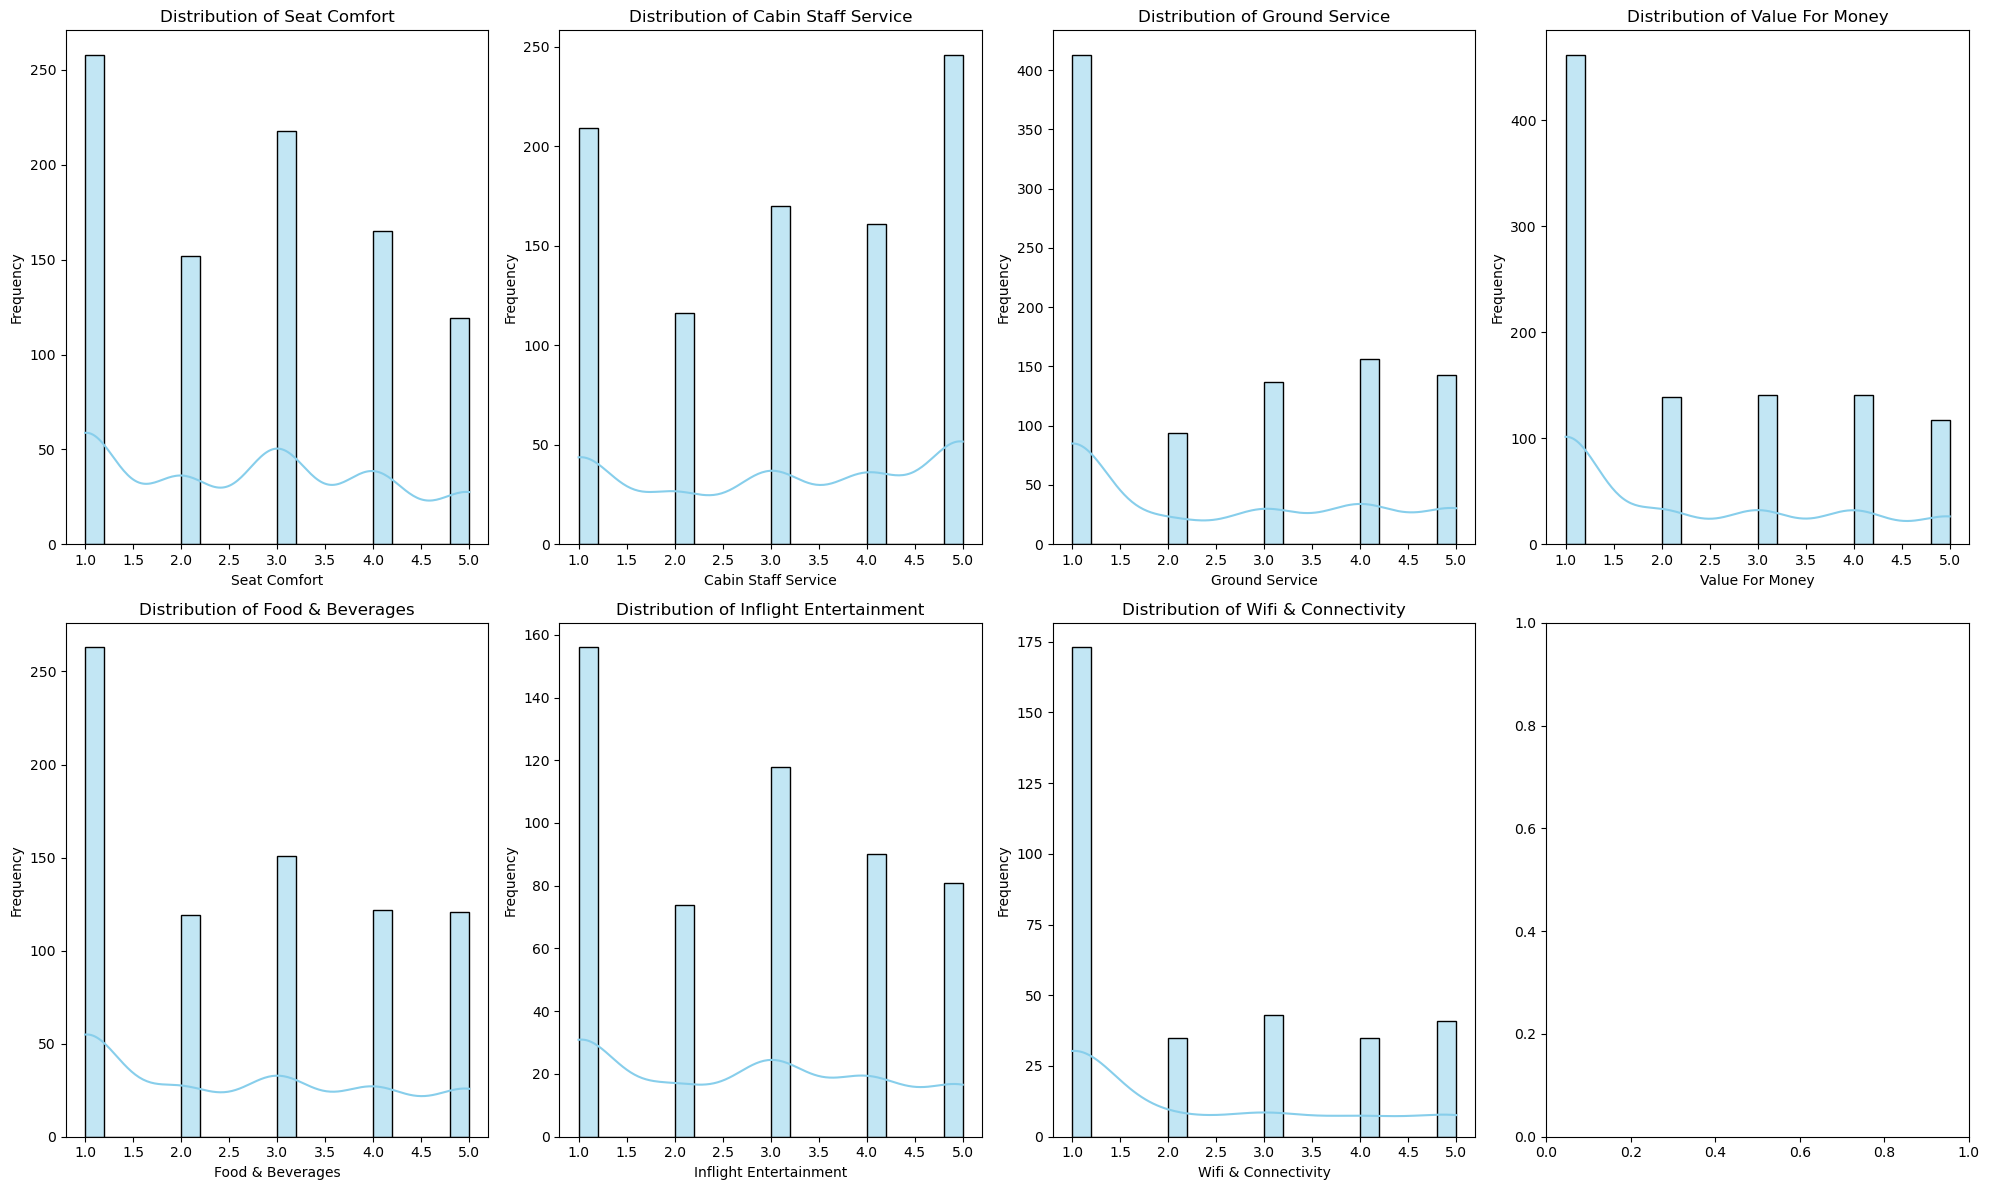

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns
numerical_columns = ['Seat Comfort', 'Cabin Staff Service', 'Ground Service', 
                     'Value For Money', 'Food & Beverages', 'Inflight Entertainment', 
                     'Wifi & Connectivity']

# Set up the subplot grid (2 rows, 4 columns for 7 variables)
fig, axes = plt.subplots(2, 4, figsize=(20, 12))

# Flatten axes for easier iteration
axes = axes.flatten()

# Visualizing the distribution of numerical columns in subplots
for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], kde=True, bins=20, color='skyblue', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


# Distribution of number of flight travels Timeline

### Count of flights year wise

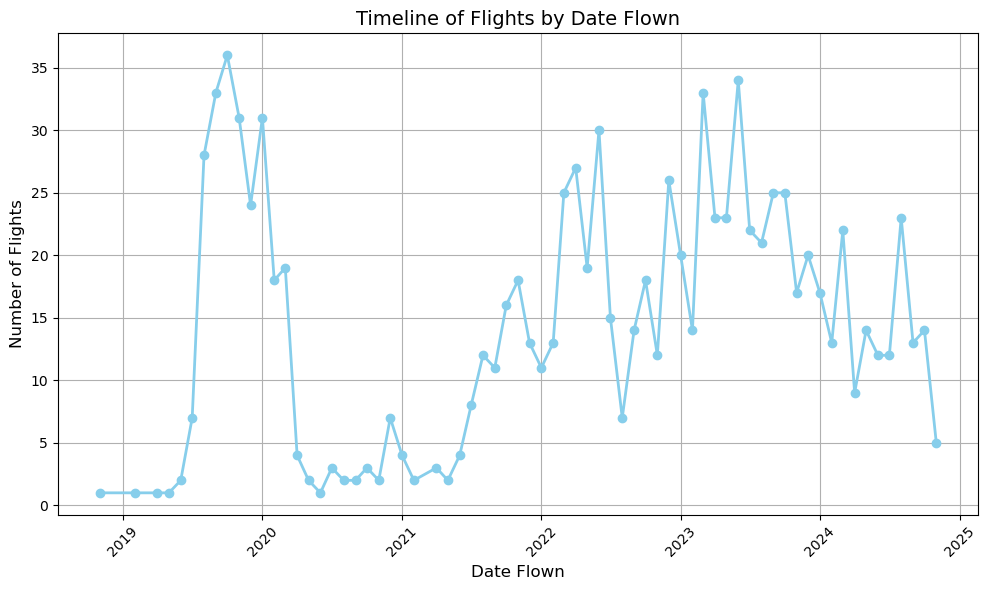

In [57]:


# Assuming 'df' is your DataFrame and it contains a column 'Date Flown'
# Ensure 'Date Flown' is in datetime format (if not already)
df['Date Flown'] = pd.to_datetime(df['Date Flown'], format='%B %Y')  # Adjust format if needed

# Group by 'Date Flown' and count occurrences of each date
date_counts = df['Date Flown'].value_counts().sort_index()

# Plotting the timeline graph
plt.figure(figsize=(10, 6))
plt.plot(date_counts.index, date_counts.values, marker='o', color='skyblue', linestyle='-', linewidth=2)

# Formatting the plot
plt.title('Timeline of Flights by Date Flown', fontsize=14)
plt.xlabel('Date Flown', fontsize=12)
plt.ylabel('Number of Flights', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


### Count of flights year and month wise

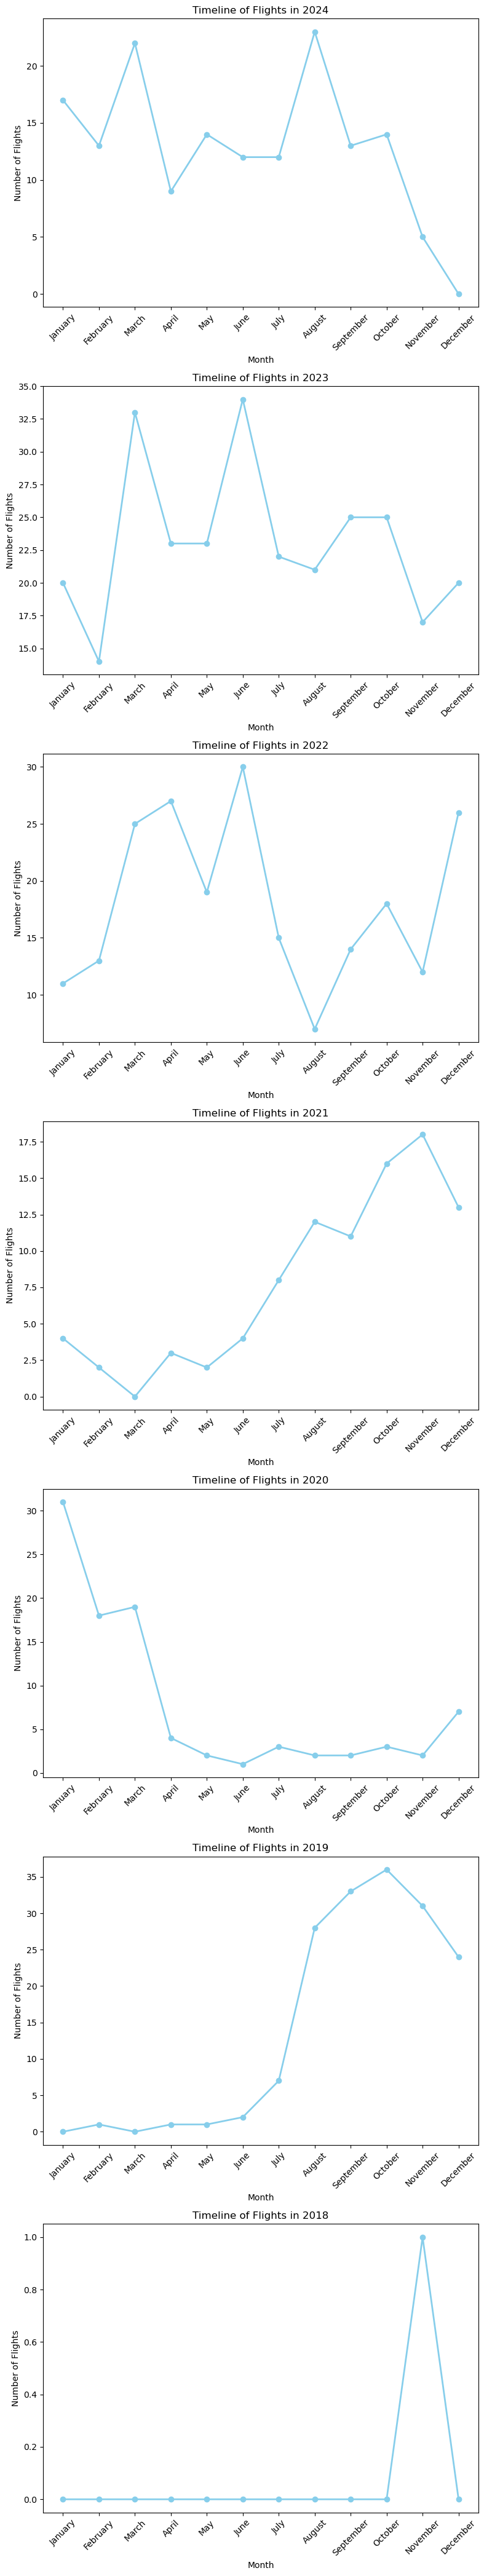

In [38]:
df['Date Flown'] = pd.to_datetime(df['Date Flown'], format='%B %Y')

# Extract Year and Month from 'Date Flown'
df['Year'] = df['Date Flown'].dt.year
df['Month'] = df['Date Flown'].dt.month_name()

# Get the unique years in the data
years = df['Year'].unique()

# Set up the subplot grid (number of rows equal to the number of unique years, 1 column)
fig, axes = plt.subplots(len(years), 1, figsize=(8, 6 * len(years)))

# If there is only one year, axes will not be an array, so we handle it separately
if len(years) == 1:
    axes = [axes]

# Iterate over each year and plot the timeline for each year
for i, year in enumerate(years):
    # Filter data for the specific year
    year_data = df[df['Year'] == year]
    
    # Group by Month and count occurrences
    month_counts = year_data['Month'].value_counts().reindex(['January', 'February', 'March', 'April', 'May', 'June', 
                                                               'July', 'August', 'September', 'October', 'November', 'December'], fill_value=0)
    
    # Plot the timeline for the specific year
    axes[i].plot(month_counts.index, month_counts.values, marker='o', color='skyblue', linestyle='-', linewidth=2)
    
    # Formatting the plot for each year
    axes[i].set_title(f'Timeline of Flights in {year}')
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('Number of Flights')
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

# Correlation matrix for numerical columns

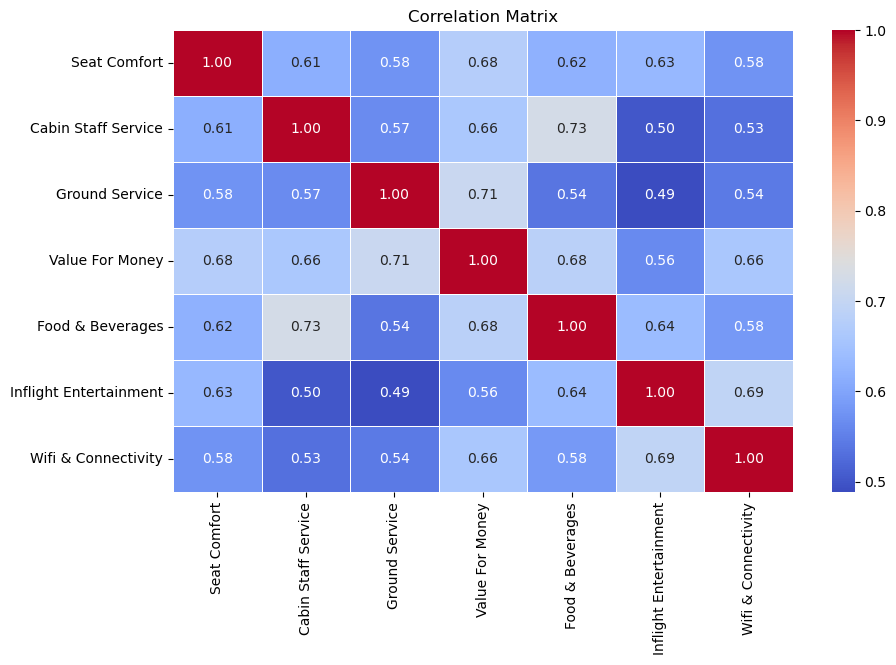

In [40]:
corr = df[numerical_columns].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


# Travel destination analysis

In [45]:
# First, handle missing values (if any)
df['Route'] = df['Route'].fillna('')

# Split the 'Route' column by 'to'
split_routes = df['Route'].str.split(' to ', expand=True)

# Check if we have two columns after splitting
if split_routes.shape[1] == 2:
    df[['Origin', 'Destination']] = split_routes
else:
    # Handle cases with 'via' or unexpected format, or add 'NaN' if split didn't work as expected
    
    df['Origin'] = split_routes[0]  # First part
    df['Destination'] = split_routes[1] if split_routes.shape[1] > 1 else pd.NA

# Check the result
print(df[['Route', 'Origin', 'Destination']].head())


                              Route     Origin           Destination
0                 London to Belfast     London               Belfast
1               Vancouver to London  Vancouver                London
2                  Malaga to London     Malaga                London
3  Keflavik to Cape Town via London   Keflavik  Cape Town via London
4  Singapore to Keflavik via London  Singapore   Keflavik via London


In [48]:
df.drop('Route', axis=1, inplace=True)

In [49]:
df

,Aircraft,Type Of Traveller,Seat Type,Date Flown,Seat Comfort,Cabin Staff Service,Ground Service,Value For Money,Recommended,Food & Beverages,Inflight Entertainment,Wifi & Connectivity,trip_verified,reviews_cleaned,Year,Month,sentiment,sentiment_category,Origin,Destination
0,A321,Family Leisure,Economy Class,2024-11-01,3.0,2.0,5.0,5,no,NaN,NaN,NaN,Yes,Trip Verified | Although like many these day...,2024,November,0.008929,Positive,London,Belfast
1,A350,Couple Leisure,Business Class,2024-11-01,5.0,5.0,3.0,4,yes,5.0,4.0,4.0,Yes,Trip Verified | This flight was British Airway...,2024,November,0.501929,Positive,Vancouver,London
2,NaN,Solo Leisure,Economy Class,2024-10-01,1.0,1.0,1.0,2,no,1.0,1.0,1.0,No,Not Verified | The worst airline I have ever f...,2024,October,-0.069421,Negative,Malaga,London
3,A350,Solo Leisure,Economy Class,2024-10-01,2.0,2.0,1.0,2,no,1.0,NaN,NaN,Yes,"Trip Verified | Disappointing service, plane...",2024,October,-0.092749,Negative,Keflavik,Cape Town via London
4,NaN,Couple Leisure,Economy Class,2024-10-01,2.0,2.0,1.0,3,no,1.0,2.0,1.0,Yes,Trip Verified | A transit visa is required f...,2024,October,-0.012500,Negative,Singapore,Keflavik via London
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,NaN,Solo Leisure,Economy Class,2019-08-01,1.0,1.0,1.0,1,no,NaN,NaN,NaN,No,Not Verified | Heathrow to Glasgow. Again fli...,2019,August,-0.287396,Negative,Heathrow,Glasgow
996,NaN,Solo Leisure,Economy Class,2019-08-01,2.0,2.0,1.0,1,no,1.0,1.0,1.0,Yes,Trip Verified | A supremely awful experience f...,2019,August,-0.041987,Negative,Inverness,Vancouver via London
997,NaN,Couple Leisure,Economy Class,2019-08-01,2.0,4.0,1.0,1,no,2.0,1.0,NaN,No,Not Verified | British Airways flight to Brus...,2019,August,0.130000,Positive,London Heathrow,Brussels
998,NaN,Solo Leisure,Economy Class,2019-08-01,NaN,NaN,1.0,1,no,NaN,NaN,NaN,Yes,Trip Verified | London to Nice. I agree total...,2019,August,0.170000,Positive,London,Nice


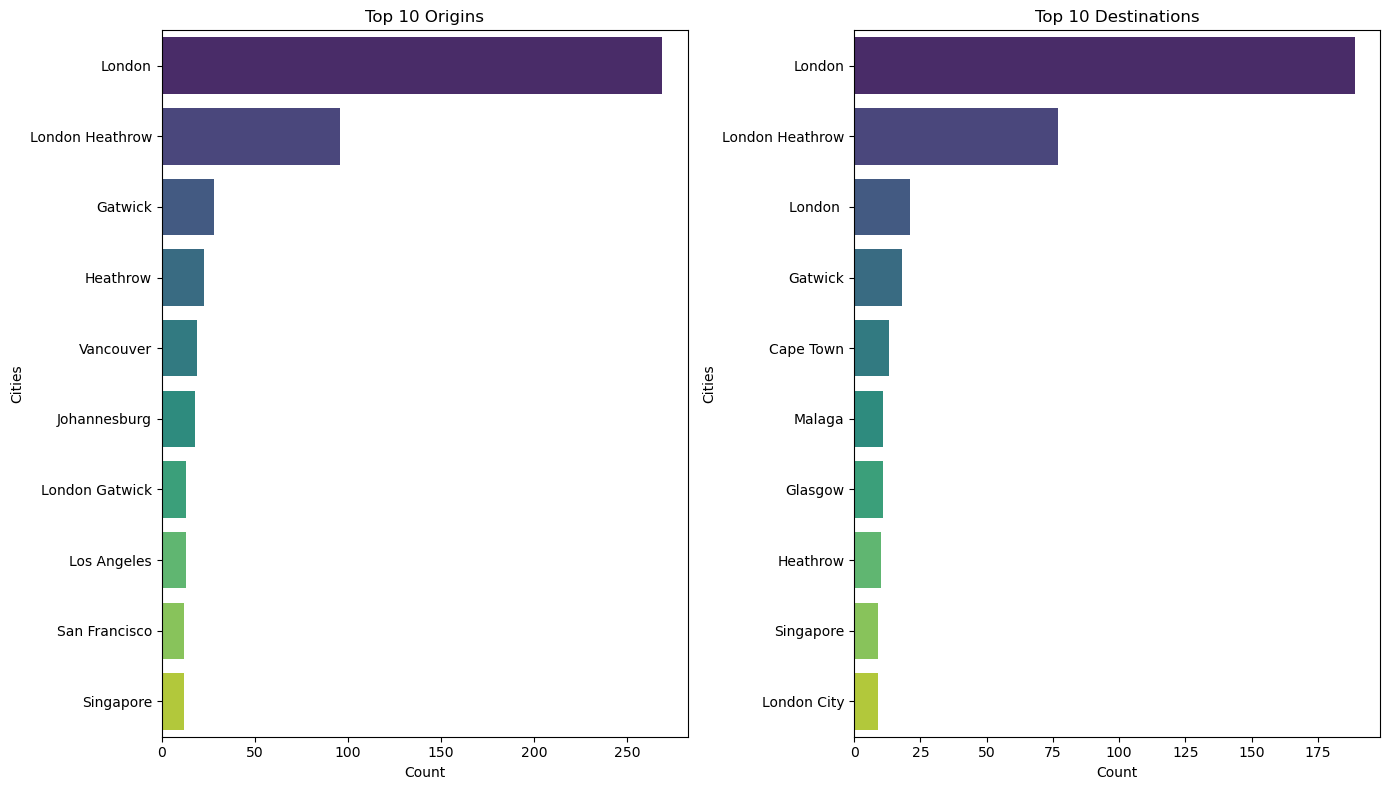

In [50]:
from_counts = df['Origin'].value_counts().head(10)  # Top 10 from destinations
to_counts = df['Destination'].value_counts().head(10)  # Top 10 to destinations

# Set up the plotting area (two subplots in one figure)
plt.figure(figsize=(14, 8))

# Horizontal bar chart for 'From Destination'
plt.subplot(1, 2, 1)
sns.barplot(x=from_counts.values, y=from_counts.index, palette='viridis')
plt.title('Top 10 Origins')
plt.xlabel('Count')
plt.ylabel('Cities')

# Horizontal bar chart for 'To Destination'
plt.subplot(1, 2, 2)
sns.barplot(x=to_counts.values, y=to_counts.index, palette='viridis')
plt.title('Top 10 Destinations')
plt.xlabel('Count')
plt.ylabel('Cities')

# Adjust the layout
plt.tight_layout()
plt.show()

# Sentimental analysis of reviews

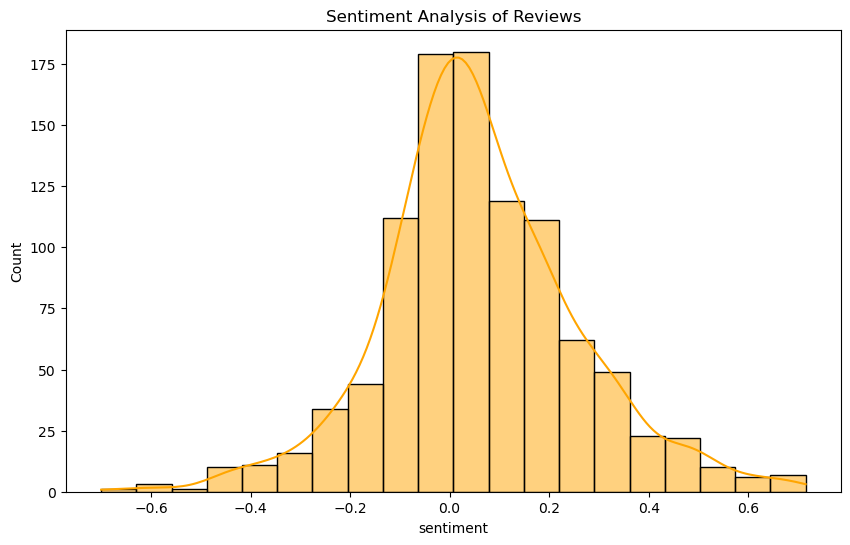

sentiment_category
Positive    613
Negative    375
Neutral      12
Name: count, dtype: int64


In [42]:
from textblob import TextBlob

# Define a function to get sentiment polarity
def get_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity

# Apply the sentiment function to the reviews column
df['sentiment'] = df['reviews_cleaned'].apply(get_sentiment)

# Visualize sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment'], kde=True, bins=20, color='orange')
plt.title('Sentiment Analysis of Reviews')
plt.show()

# Optionally, categorize sentiment as Positive, Neutral, Negative
df['sentiment_category'] = df['sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Count the sentiment categories
print(df['sentiment_category'].value_counts())


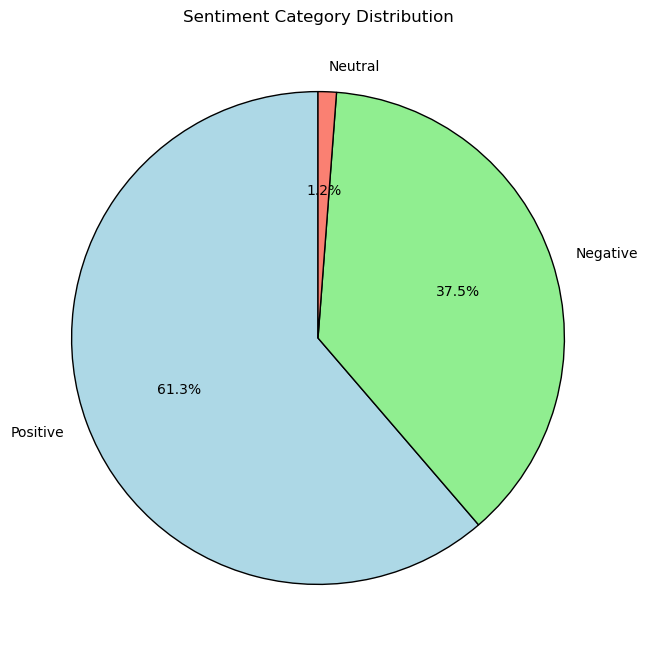

In [51]:
sentiment_counts = df['sentiment_category'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'salmon', 'orange'], startangle=90, wedgeprops={'edgecolor': 'black'})

# Add a title
plt.title('Sentiment Category Distribution')

# Display the pie chart
plt.ylabel('')  # To remove the ylabel
plt.show()